In [ ]:
pip install highlight_text

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import urllib
import matplotlib.pyplot as plt
from highlight_text import fig_text

In [ ]:
df=pd.read_html("https://fbref.com/en/squads/b8fd03ef/2022-2023/c9/Manchester-City-Stats-Premier-League" )[0]

In [ ]:
list_cols=df.columns
columns_=[]
for i in list_cols:
    columns_.append(i[-1])
df.columns=columns_

In [ ]:
# This is random data.
data = {
    'teams': ['Real Madrid', 'Barcelona', 'Villarreal', 'Sevilla'],
    'goals_scored': [23, 15, 28, 12]
}

In [ ]:
df.columns

Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
       'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls', 'Ast', 'G+A', 'G-PK',
       'G+A-PK', 'xG', 'xAG', 'xG+xAG', 'npxG', 'npxG+xAG', 'Matches'],
      dtype='object')

In [ ]:
required_cols=["Player","Pos","MP","Min","Starts"]
df=df[required_cols]

In [ ]:
df=df.head(22).sort_values(by="MP", ascending=True).reset_index(drop=True)

In [ ]:
#df=df.drop("index",axis=1)

In [ ]:
pics_url=["363364.png","675088.png","737066.png","488139.png","815006.png","169200.png","178818.png","974753.png","278343.png","521318.png","312765.png","159833.png","614006.png","417068.png","263653.png","361757.png","1288450.png","1096353.png","609755.png","411617.png","844477.png","276729.png"][::-1]

In [ ]:
def ax_logo(player_id, ax):
    '''
    Plots the picture of a player at a specific axes.
    Args:
        Player_id (int): the id of the player according to Fotmob.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/playerimages/'
    player_url=f'{fotmob_url}{player_id}'
    player_image= Image.open(urllib.request.urlopen(player_url))
    ax.imshow(player_image)
    ax.axis('off')
    return ax

In [ ]:
def minutes_battery(minutes, ax):
    '''
    This function takes an integer and an axes and
    plots a battery chart.
    '''
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.barh([0.5], [1], fc = 'white', ec='black', height=.35)
    ax.barh([0.5], [minutes/(90*38)], fc = '#00529F', height=.35)
    text_ = ax.annotate(
        xy=(minutes/(90*38), .5),
        text=f'{minutes/(90*38):.0%}',
        xytext=(-8,0),
        textcoords='offset points',
        weight='bold',
        color='#EFE9E6',
        va='center',
        ha='center',
        size=6
    )
    ax.set_axis_off()
    return ax

(-0.5, 191.5, 191.5, -0.5)

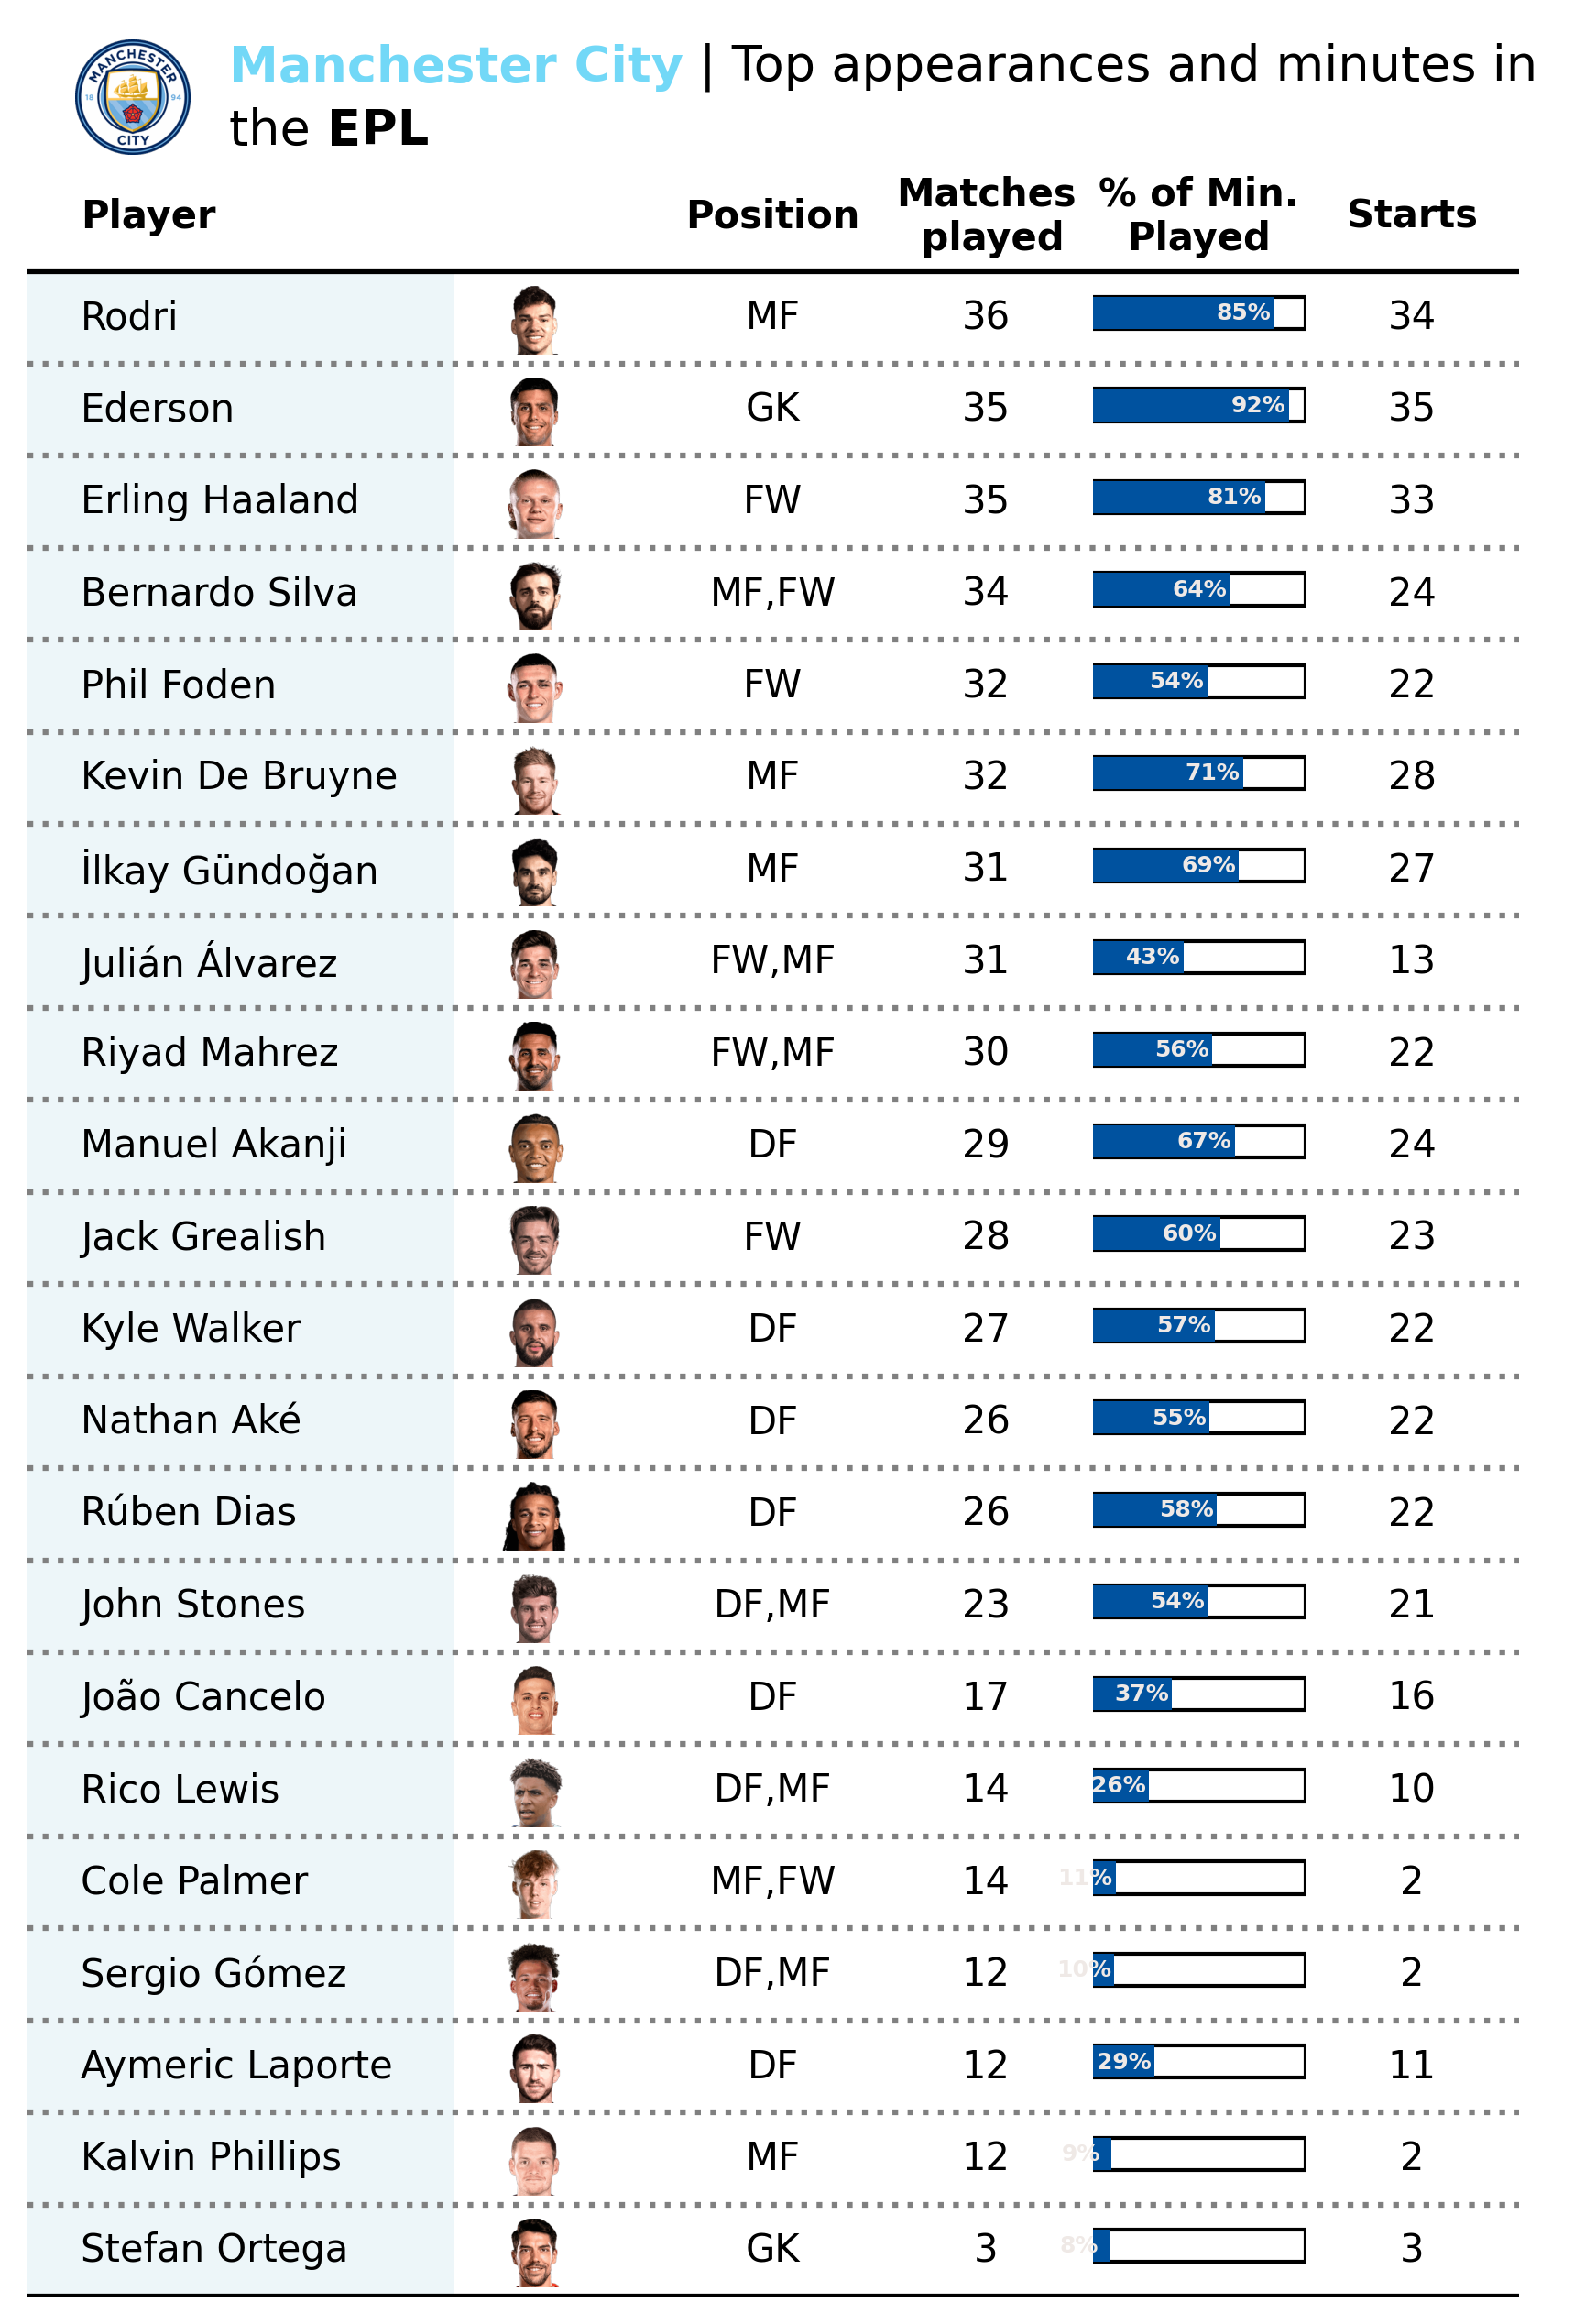

In [ ]:
ncols=df.shape[1]
nrows=df.shape[0]

fig = plt.figure(figsize=(7,10), dpi=300)
ax = plt.subplot()

ax.set_xlim(0, ncols+2)
ax.set_ylim(0, nrows+1)

positions=[0.25,3.5,4.5,5.5,6.5]
columns=df.columns

for i in range(nrows):
    for j,col in enumerate(columns):
        if j!=3:
            if j==0:
                ha="left"
            else:
                ha = "center"

            ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=df[col].iloc[i],
                    ha=ha,
                    va='center'
                )

cols=["Player","Position","Matches\n played","% of Min.\nPlayed","Starts" ]
for j, col in enumerate(cols):
    ha="center"
    if j==0:
        ha="left"
    ax.annotate(
            xy=(positions[j], nrows+0.6),
                text=f"{col}",
                ha=ha,
                va='center', weight="bold" )

ax.set_axis_off()

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for i in range(1,nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [i, i], lw=1.5, marker='', zorder=4,color='gray', ls=':')


# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.5])
ax_point_2 = DC_to_NFC([3, 1.25])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([2, x + .1])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    ax_logo(pics_url[x], flag_ax)


ax.fill_between(
    x=[0,2],
    y1=nrows,
    y2=0,
    color='#dceff5',
    alpha=0.5,
    ec='None'
)

ax_point_1 = DC_to_NFC([5.5, 0.5])
ax_point_2 = DC_to_NFC([6.5, 1.5])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([5, x + .05])
    bar_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    minutes_battery(df['Min'].iloc[x], bar_ax)

#header and logo
fig_text(
    x = 0.23, y = 0.93,
    s = "<Manchester City> | Top appearances and minutes in \nthe <EPL>",
    color = "black",
    size = 13,
    highlight_textprops = [
        {"color": "#72d8f7","weight":"bold"},
        {"weight":"bold"},
    ],
    annotationbbox_kw={"xycoords": "figure fraction"}
)

#image url https://images.fotmob.com/image_resources/logo/teamlogo/8456.png
club_url="https://images.fotmob.com/image_resources/logo/teamlogo/8456.png"
#Get and Open the club logo
league_logo = Image.open(urllib.request.urlopen(club_url))
#create new axes at top right corner [left_position,bottom_position,width,hight]
logo_ax = fig.add_axes([0.15, 0.88, 0.06, 0.06])
#paste logo on the axes
logo_ax.imshow(league_logo)
#switch off  the axis off our AXES
logo_ax.axis("off")